<h1>Import bibliotek</h1>

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

<h1>Wczytanie zbioru danych</h1>

In [106]:
titanic = pd.read_csv("titanic.csv", index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male


<h1>Oczyszczanie zbioru</h1>

In [107]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Sex       891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Usunięcię wierszy z brakami spowoduje przez kolumnę 'Cabin' utratę bardzo dużej ilości danych, a w przypadku próby wypełnienia jej uzyskamy właściwie kolumnę syntetycznych danych co nie będzie nam przydatne. 
<br>Najlepsza opcja w tym przypadku to usunięcie tej kolumny. 
<br>Inne kolumny, które zostaną usunięte to 'Name' i 'Ticket', ponieważ nie są istotne w kontekście zadania oraz 'Survived' jako klasa, którą chcemy predykować.

In [108]:
titanic = titanic.drop(['Cabin','Name','Ticket', 'Survived'], axis=1)
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,S,male
2,1,38.0,1,0,71.2833,C,female
3,3,26.0,0,0,7.9250,S,female
4,1,35.0,1,0,53.1000,S,female
5,3,35.0,0,0,8.0500,S,male


Dalej pozostają nam brakujące wartości w kolumnach 'Age' i 'Embarked'. 
<br>Kolumna 'Embarked' zawiera tylko 2 brakujące wartości więc najlepiej będzie je wypełnić wartością występującą najczęściej.

In [109]:
x = titanic['Embarked'].mode()[0]
dict = {'Embarked':x}
titanic.fillna(dict, inplace = True)

Kolumna 'Age' zostanie uzupełniona za pomocą losowania wartości zgodnie z jej rozkładem.

In [110]:
distribution = titanic['Age'].value_counts(normalize=True)
values = distribution.index
probs = distribution.values
age_NaN = titanic.Age.isna()
titanic.loc[age_NaN, 'Age'] = np.random.choice(values, size=age_NaN.sum(), p=probs)

In [111]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Sex       891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


Jak widać nie ma już żadnych brakujących wartości.

<h1>Wstawienie dodatkowych kolumn</h1>

Informacją, która może okazać się przydatna jest liczba wszystkich członków rodziny (rodzeństwa, małżonków, rodziców i dzieci) na pokładzie razem.

In [112]:
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilyMembers
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,S,male,1
2,1,38.0,1,0,71.2833,C,female,1
3,3,26.0,0,0,7.9250,S,female,0
4,1,35.0,1,0,53.1000,S,female,1
5,3,35.0,0,0,8.0500,S,male,0


Następną ukrytą cechą, którą da się zdobyć ze zbioru jest podział na dzieci i dorosłych (od razu z kodowaniem). 

In [113]:
titanic['IsChild'] = np.where(titanic['Age'] >= 18, 0, 1)
titanic.head(15)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,S,male,1,0
2,1,38.0,1,0,71.2833,C,female,1,0
3,3,26.0,0,0,7.9250,S,female,0,0
4,1,35.0,1,0,53.1000,S,female,1,0
5,3,35.0,0,0,8.0500,S,male,0,0
6,3,40.0,0,0,8.4583,Q,male,0,0
7,1,54.0,0,0,51.8625,S,male,0,0
8,3,2.0,3,1,21.0750,S,male,4,1
9,3,27.0,0,2,11.1333,S,female,2,0


<h1>Kodowanie zmiennych kategorialnych</h1>

Zmienne kategorialne w naszym zbiorze zawierają kolumny 'Sex', 'Embarked' i 'Pclass'.

In [114]:
print(titanic.Sex.unique())
print(titanic.Embarked.unique())
print(titanic.Pclass.unique())

['male' 'female']
['S' 'C' 'Q']
[3 1 2]


Dzięki powyższemu kodowi widać, że kolumny nie zawierają żadnych nieprawidłowych wartości, które mogłyby mieć negatywny wpływ na kodowanie.
<br>Kolumna 'Pclass' już zawiera kategorie w formacie liczbowym, więc nie trzeba jej zmieniać.

In [115]:
titanic['Sex'] = titanic.Sex.map({'female': 1, 'male': 0})
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,S,0,1,0
2,1,38.0,1,0,71.2833,C,1,1,0
3,3,26.0,0,0,7.9250,S,1,0,0
4,1,35.0,1,0,53.1000,S,1,1,0
5,3,35.0,0,0,8.0500,S,0,0,0


In [116]:
titanic['Embarked'] = titanic.Embarked.map({'S': 2, 'C': 1, 'Q': 0})
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,2,0,1,0
2,1,38.0,1,0,71.2833,1,1,1,0
3,3,26.0,0,0,7.9250,2,1,0,0
4,1,35.0,1,0,53.1000,2,1,1,0
5,3,35.0,0,0,8.0500,2,0,0,0


<h1>Badanie występowania wartości skrajnych</h1>

Kolumny zawierające dane kategorialne zostały zbadane pod względem wartości skrajnych podczas rozwiązywania poprzedniego zagadnienia dlatego teraz zajmiemy się wartościami numerycznymi.
<br>Kolumnami dodanymi wcześniej też nie ma potrzeby się zajmować, więc analizie poddane zostaną kolumny: 'Age', 'SibSp', 'Parch', 'Fare'.

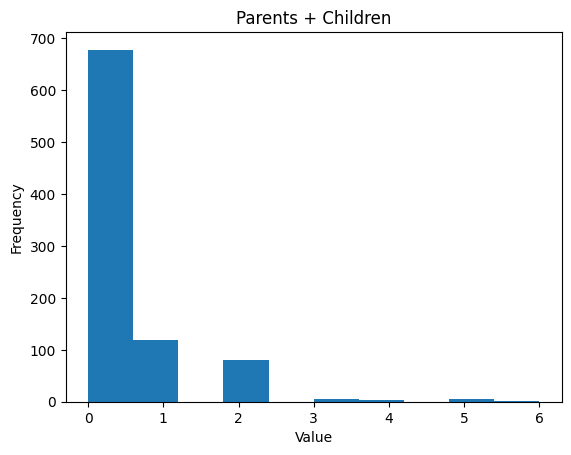

In [119]:
plt.hist(titanic['Parch'])
plt.title("Parents + Children")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

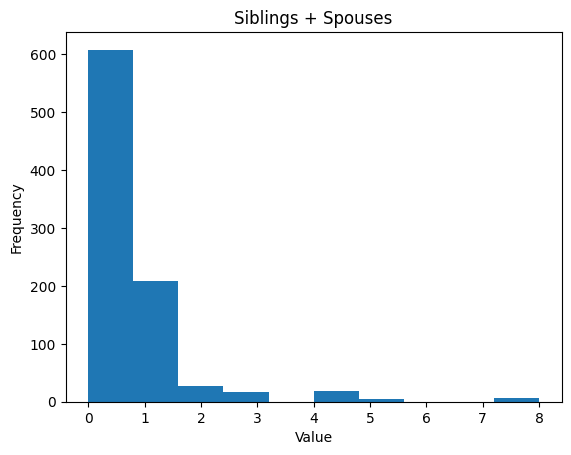

In [120]:
plt.hist(titanic['SibSp'])
plt.title("Siblings + Spouses")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

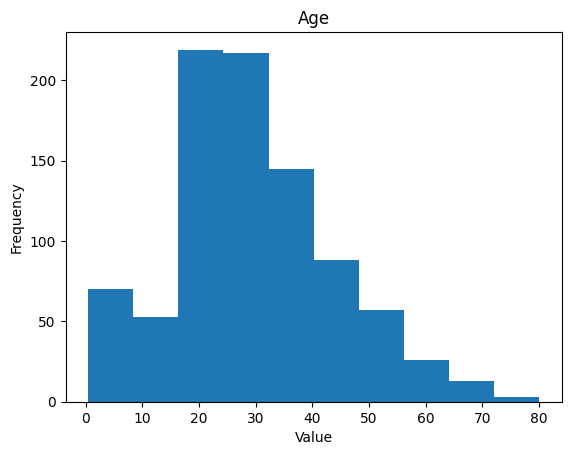

In [122]:
plt.hist(titanic['Age'])
plt.title("Age")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Bazując na wykresach wartości, które zostały podane w kolumnach 'SibSp', 'Parch' i 'Age' wyglądają wiarygodnie i nie wymagają specjalnego przetwarzania.

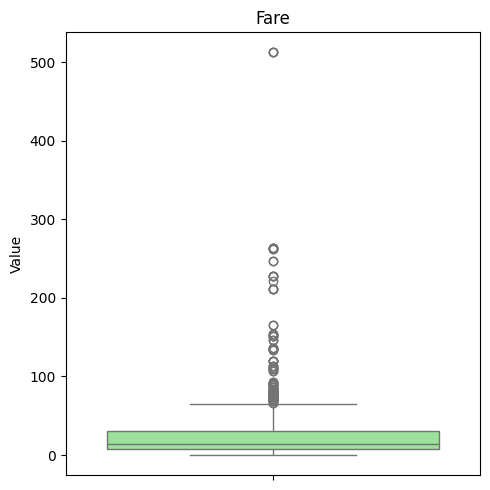

In [128]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=titanic['Fare'], color='lightgreen')
plt.title("Fare")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

Na powyższym wykresie widać grupę odstających cen za bilety oraz pojedynczą najwyższą cenę znacząco odstającą od reszty.
<br>Bilety w odstającej grupie mogły zostać zakupione przez najbardziej zamożną część podróżujących - z tego powodu jest ich na tyle mało, że kwalifikują się jako wartości odstające.
<br>Pojedyncza wartość może mieć takie samo wytłumaczenie jak opisane powyżej lub może być to błąd.

<h1>Wizualizacje cech</h1>

In [134]:
titanic.columns.tolist()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Sex',
 'FamilyMembers',
 'IsChild']

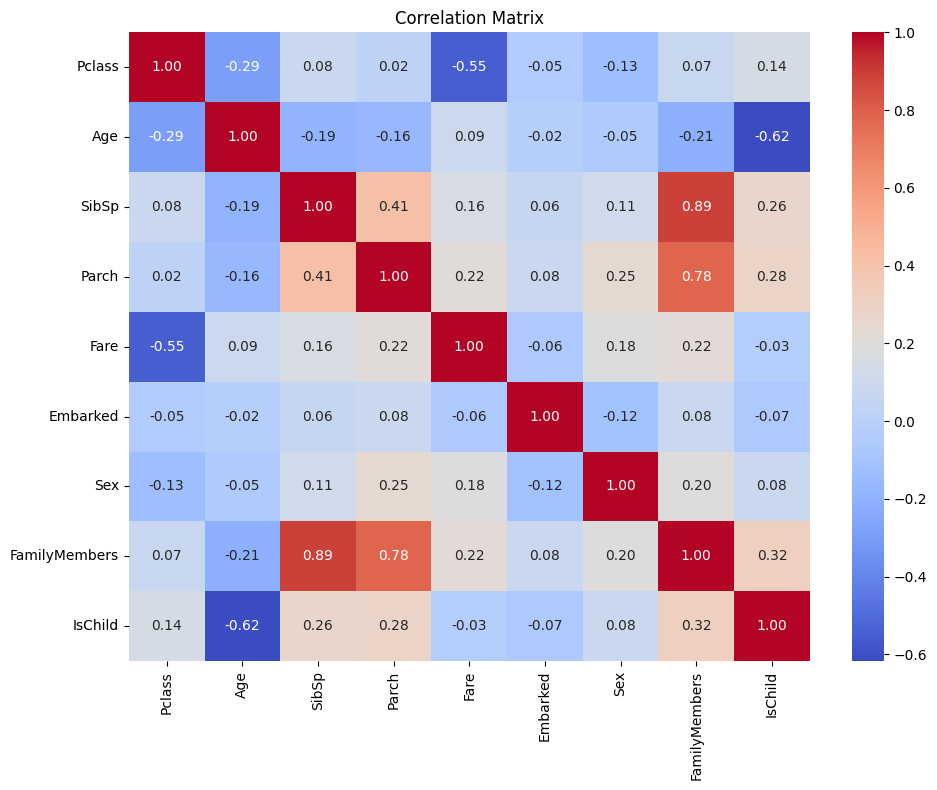

In [142]:
corr = titanic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Na heatmapie poza przekątną widać silną korelację między FamilyMembers, a SibSp i Parch co jest spowodowane tym, że kolumna ta powstała na podstawie tamtych dwóch. Podobny powód zapewnia wysoką negatywną korelację IsChild i Age.

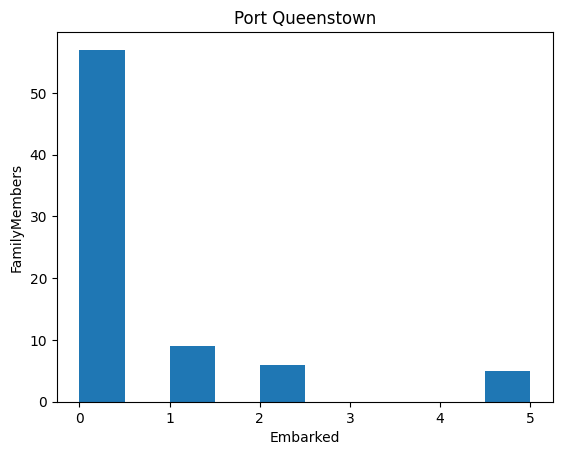

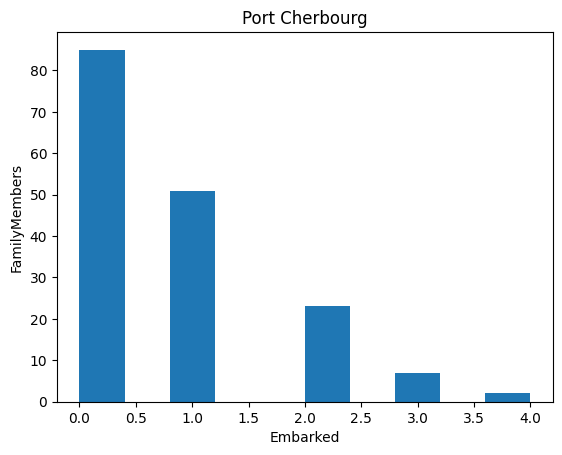

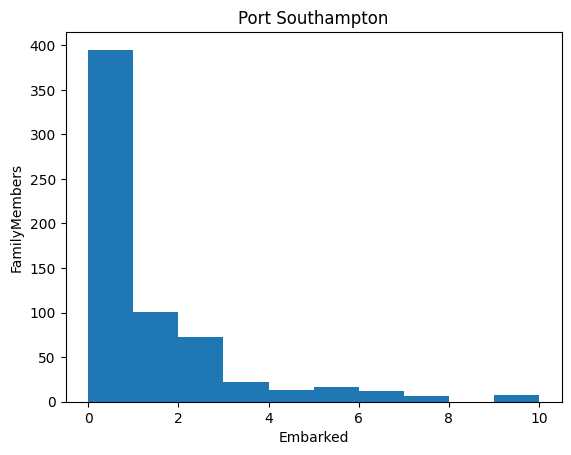

In [166]:
for port, group in titanic.groupby('Embarked'):
    enc = {1:'Cherbourg', 0:'Queenstown', 2:'Southampton'}
    plt.hist(group['FamilyMembers'])
    plt.title(f"Port {enc.get(port)}")
    plt.xlabel("Embarked")
    plt.ylabel("FamilyMembers")
    plt.show()

Najwięcej i największe rodziny wsiadały w porcie Southampton, a najmniej i najmniejsze w Queenstown - możliwe, że istniały różnice między strukturą społeczeństw tych miast.

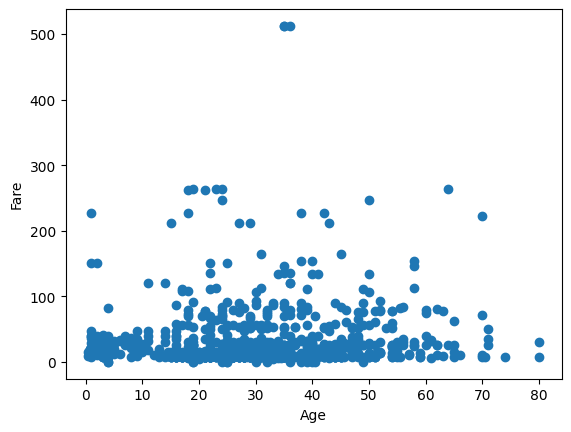

In [167]:
plt.scatter(titanic['Age'], titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Nie ma zależności między wysokością opłaty za bilet a wiekiem pasażera.

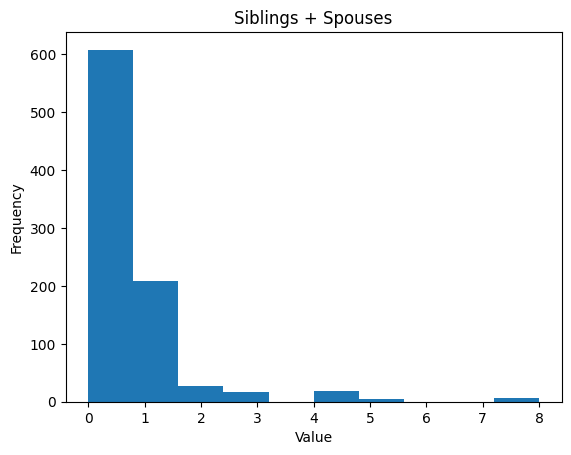

In [170]:
plt.hist(titanic['SibSp'])
plt.title("Siblings + Spouses")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

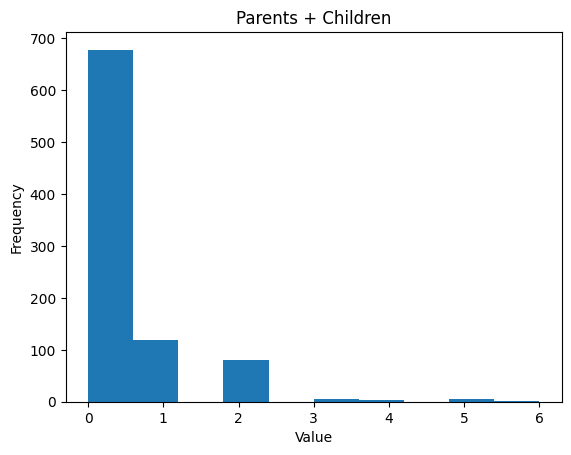

In [171]:
plt.hist(titanic['Parch'])
plt.title("Parents + Children")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Widać, że większość podróżowała bez rodzeństwa, małżonków, rodziców ani dzieci.

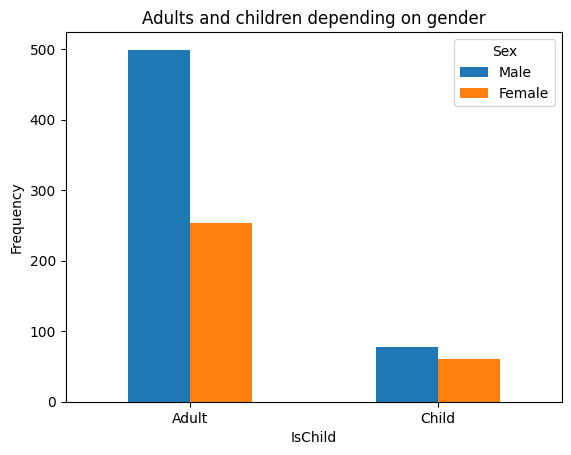

In [176]:
counts = titanic.groupby(['IsChild', 'Sex']).size().unstack(fill_value=0)
counts.index = counts.index.map({0: 'Adult', 1: 'Child'})
counts.columns = counts.columns.map({0: 'Male', 1: 'Female'})
counts.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Adults and children depending on gender')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()

W obu grupach wiekowych dominuje płeć męska oraz widać znaczącą przewagę liczby dorosłych nad liczbą dzieci na pokładzie.

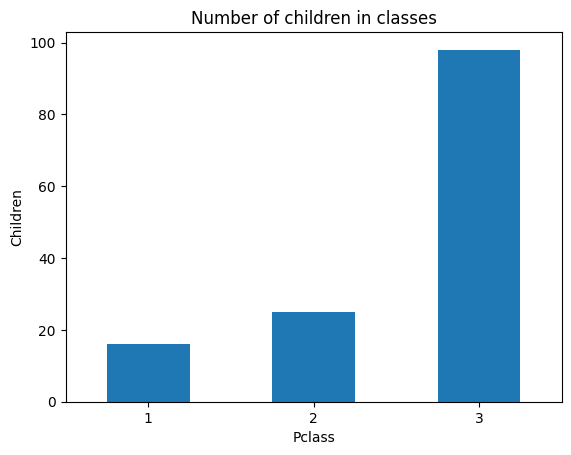

In [181]:
child = titanic[titanic['IsChild'] == 1].groupby('Pclass').size()
child.plot(kind='bar')
plt.title('Number of children in classes')
plt.xlabel('Pclass')
plt.ylabel('Children')
plt.xticks(rotation=0)
plt.show()

Jak widać najwięcej dzieci było w klasie trzeciej.